In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import *

In [5]:
#import datset
train = pd.read_csv("/content/train.csv").set_index('id')
test = pd.read_csv("/content/test.csv").set_index('id')
sample = pd.read_csv("/content/sample_submission.csv")

In [6]:
train['data'] = 'train'
test['data'] = 'test'

In [7]:
print(train.shape)
print(test.shape)

(12969, 24)
(25991, 23)


In [8]:
all_data = pd.concat([train, test], axis=0).reset_index(drop=True)

In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38960 entries, 0 to 38959
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38960 non-null  int64  
 1   height(cm)           38960 non-null  int64  
 2   weight(kg)           38960 non-null  int64  
 3   waist(cm)            38960 non-null  float64
 4   eyesight(left)       38960 non-null  float64
 5   eyesight(right)      38960 non-null  float64
 6   hearing(left)        38960 non-null  int64  
 7   hearing(right)       38960 non-null  int64  
 8   systolic             38959 non-null  float64
 9   relaxation           38958 non-null  float64
 10  fasting blood sugar  38958 non-null  float64
 11  Cholesterol          38958 non-null  float64
 12  triglyceride         38958 non-null  float64
 13  HDL                  38958 non-null  float64
 14  LDL                  38958 non-null  float64
 15  hemoglobin           38958 non-null 

In [10]:
(all_data.isnull().sum() / len(all_data) ) * 100

age                     0.000000
height(cm)              0.000000
weight(kg)              0.000000
waist(cm)               0.000000
eyesight(left)          0.000000
eyesight(right)         0.000000
hearing(left)           0.000000
hearing(right)          0.000000
systolic                0.002567
relaxation              0.005133
fasting blood sugar     0.005133
Cholesterol             0.005133
triglyceride            0.005133
HDL                     0.005133
LDL                     0.005133
hemoglobin              0.005133
Urine protein           0.005133
serum creatinine        0.005133
AST                     0.005133
ALT                     0.005133
Gtp                     0.005133
dental caries           0.005133
smoking                66.714579
data                    0.000000
dtype: float64

In [11]:
#Check for duplicate values
dups = all_data.duplicated()
print("Number of duplicated rows = %d" %(dups.sum()))
all_data[dups]

Number of duplicated rows = 0


Empty DataFrame
Columns: [age, height(cm), weight(kg), waist(cm), eyesight(left), eyesight(right), hearing(left), hearing(right), systolic, relaxation, fasting blood sugar, Cholesterol, triglyceride, HDL, LDL, hemoglobin, Urine protein, serum creatinine, AST, ALT, Gtp, dental caries, smoking, data]
Index: []

[0 rows x 24 columns]

In [12]:
#Check for the unwanted text or symbol in the data
for i in all_data.columns:
    print("****************************************************", i ,
          "*****************************************************************")
    print()
    print(set(all_data[i].tolist()))
    print()

**************************************************** age *****************************************************************

{65, 35, 70, 40, 75, 45, 80, 50, 20, 85, 55, 25, 60, 30}

**************************************************** height(cm) *****************************************************************

{160, 165, 135, 170, 140, 174, 175, 145, 180, 181, 150, 185, 155, 190}

**************************************************** weight(kg) *****************************************************************

{130, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125}

**************************************************** waist(cm) *****************************************************************

{51.0, 56.0, 57.4, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.2, 68.5, 67.0, 68.0, 69.0, 70.0, 71.5, 74.1, 75.3, 74.6, 77.1, 78.3, 75.1, 79.3, 73.0, 77.0, 77.2, 75.0, 76.0, 86.9, 87.7, 82.0, 83.0, 83.4, 85.5, 85.7, 86.2, 87.8, 95.6, 89.6, 89.5, 90

In [13]:
all_data.shape

(38960, 24)

In [14]:
#filling null values

In [15]:
null_df = all_data.copy()

In [16]:
df_numerics_only = null_df.select_dtypes(include=np.number)
df_numerics_only

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0       55         165          60       81.0             0.5   
1       70         165          65       89.0             0.6   
2       20         170          75       81.0             0.4   
3       35         180          95      105.0             1.5   
4       30         165          60       80.5             1.5   
...    ...         ...         ...        ...             ...   
38955   40         160          65       79.0             1.2   
38956   60         160          55       75.0             1.2   
38957   50         170          65       80.0             1.0   
38958   40         150          75       95.5             1.2   
38959   55         155          60       75.0             1.0   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0                  0.6              1               1     135.0        87.0   
1                  0.7              2               2     146.0        83.0   
2                  0.5              1               1     118.0        75.0   
3                  1.2              1               1     131.0        88.0   
4                  1.0              1               1     121.0        76.0   
...                ...            ...             ...       ...         ...   
38955              1.0              1               1     136.0        92.0   
38956              1.2              1               1     128.0        76.0   
38957              0.9              1               1     150.0       100.0   
38958              1.0              1               1     122.0        78.0   
38959              0.7              1               1     116.0         NaN   

       ...   HDL    LDL  hemoglobin  Urine protein  serum creatinine   AST  \
0      ...  40.0   75.0        16.5            1.0               1.0  22.0   
1      ...  57.0  126.0        16.2            1.0               1.1  27.0   
2      ...  45.0   93.0        17.4            1.0               0.8  27.0   
3      ...  38.0  102.0        15.9            1.0               1.0  20.0   
4      ...  44.0   93.0        15.4            1.0               0.8  19.0   
...    ...   ...    ...         ...            ...               ...   ...   
38955  ...  54.0  133.0        15.3            1.0               0.9  17.0   
38956  ...  50.0   90.0        13.1            1.0               0.8  17.0   
38957  ...  65.0  151.0        14.2            1.0               0.9  26.0   
38958  ...  60.0  151.0        12.6            1.0               0.8  14.0   
38959  ...   NaN    NaN         NaN            NaN               NaN   NaN   

        ALT   Gtp  dental caries  smoking  
0      25.0  27.0            0.0      1.0  
1      23.0  37.0            1.0      0.0  
2      31.0  53.0            0.0      1.0  
3      27.0  30.0            1.0      0.0  
4      13.0  17.0            0.0      1.0  
...     ...   ...            ...      ...  
38955  16.0  59.0            0.0      NaN  
38956  13.0  13.0            1.0      NaN  
38957  20.0  31.0            0.0      NaN  
38958  17.0  23.0            0.0      NaN  
38959   NaN   NaN            NaN      NaN  

[38960 rows x 23 columns]

In [17]:
null_df.describe()

age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  38960.000000  38960.000000  38960.000000  38960.000000    38960.000000   
mean      44.467531    165.162859     67.011165     82.922274        1.004194   
std       11.858779      8.808992     12.599551      8.980231        0.407780   
min       20.000000    135.000000     30.000000     51.000000        0.100000   
25%       40.000000    160.000000     60.000000     77.000000        0.800000   
50%       40.000000    165.000000     65.000000     83.000000        1.000000   
75%       55.000000    170.000000     75.000000     89.000000        1.200000   
max       85.000000    190.000000    130.000000    127.700000        9.900000   

       eyesight(right)  hearing(left)  hearing(right)      systolic  \
count     38960.000000   38960.000000    38960.000000  38959.000000   
mean          0.998858       1.026052        1.025154    122.441618   
std           0.397499       0.159293        0.156595     12.808037   
min           0.100000       1.000000        1.000000     80.000000   
25%           0.800000       1.000000        1.000000    114.000000   
50%           1.000000       1.000000        1.000000    121.000000   
75%           1.200000       1.000000        1.000000    130.000000   
max           9.900000       2.000000        2.000000    213.000000   

         relaxation  ...           HDL           LDL    hemoglobin  \
count  38958.000000  ...  38958.000000  38958.000000  38958.000000   
mean      76.824118  ...     55.901740    114.639484     14.790087   
std        9.060232  ...     14.007185     27.080513      1.421886   
min       40.000000  ...     25.000000     10.000000      5.000000   
25%       70.000000  ...     45.000000     95.000000     13.800000   
50%       78.000000  ...     54.000000    114.000000     15.000000   
75%       82.000000  ...     64.000000    133.000000     15.800000   
max      129.000000  ...    133.000000   1660.000000     21.100000   

       Urine protein  serum creatinine           AST           ALT  \
count   38958.000000      38958.000000  38958.000000  38958.000000   
mean        1.074670          0.893126     25.516454     26.386827   
std         0.344066          0.177817      9.104303     15.109032   
min         1.000000          0.100000      9.000000      1.000000   
25%         1.000000          0.800000     20.000000     16.000000   
50%         1.000000          0.900000     24.000000     22.000000   
75%         1.000000          1.000000     29.000000     32.000000   
max         5.000000          5.900000    326.000000    252.000000   

                Gtp  dental caries       smoking  
count  38958.000000   38958.000000  12968.000000  
mean      35.810617       0.195826      0.443322  
std       29.796664       0.396841      0.496796  
min        3.000000       0.000000      0.000000  
25%       18.000000       0.000000      0.000000  
50%       27.000000       0.000000      0.000000  
75%       43.000000       0.000000      1.000000  
max      976.000000       1.000000      1.000000  

[8 rows x 23 columns]

In [18]:
df_numerics_only.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [19]:
def fill_na(df):
  for i in df_numerics_only.columns:
    df[i].fillna(df[i].median(), inplace=True)


In [20]:
fill_na(null_df)

In [21]:
null_df.describe()

age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  38960.000000  38960.000000  38960.000000  38960.000000    38960.000000   
mean      44.467531    165.162859     67.011165     82.922274        1.004194   
std       11.858779      8.808992     12.599551      8.980231        0.407780   
min       20.000000    135.000000     30.000000     51.000000        0.100000   
25%       40.000000    160.000000     60.000000     77.000000        0.800000   
50%       40.000000    165.000000     65.000000     83.000000        1.000000   
75%       55.000000    170.000000     75.000000     89.000000        1.200000   
max       85.000000    190.000000    130.000000    127.700000        9.900000   

       eyesight(right)  hearing(left)  hearing(right)      systolic  \
count     38960.000000   38960.000000    38960.000000  38960.000000   
mean          0.998858       1.026052        1.025154    122.441581   
std           0.397499       0.159293        0.156595     12.807875   
min           0.100000       1.000000        1.000000     80.000000   
25%           0.800000       1.000000        1.000000    114.000000   
50%           1.000000       1.000000        1.000000    121.000000   
75%           1.200000       1.000000        1.000000    130.000000   
max           9.900000       2.000000        2.000000    213.000000   

         relaxation  ...           HDL           LDL    hemoglobin  \
count  38960.000000  ...  38960.000000  38960.000000  38960.000000   
mean      76.824179  ...     55.901643    114.639451     14.790098   
std        9.060004  ...     14.006833     27.079819      1.421850   
min       40.000000  ...     25.000000     10.000000      5.000000   
25%       70.000000  ...     45.000000     95.000000     13.800000   
50%       78.000000  ...     54.000000    114.000000     15.000000   
75%       82.000000  ...     64.000000    133.000000     15.800000   
max      129.000000  ...    133.000000   1660.000000     21.100000   

       Urine protein  serum creatinine           AST           ALT  \
count   38960.000000      38960.000000  38960.000000  38960.000000   
mean        1.074666          0.893126     25.516376     26.386602   
std         0.344058          0.177813      9.104076     15.108677   
min         1.000000          0.100000      9.000000      1.000000   
25%         1.000000          0.800000     20.000000     16.000000   
50%         1.000000          0.900000     24.000000     22.000000   
75%         1.000000          1.000000     29.000000     32.000000   
max         5.000000          5.900000    326.000000    252.000000   

                Gtp  dental caries       smoking  
count  38960.000000   38960.000000  38960.000000  
mean      35.810164       0.195816      0.147562  
std       29.795966       0.396833      0.354669  
min        3.000000       0.000000      0.000000  
25%       18.000000       0.000000      0.000000  
50%       27.000000       0.000000      0.000000  
75%       43.000000       0.000000      0.000000  
max      976.000000       1.000000      1.000000  

[8 rows x 23 columns]

In [22]:
null_df.shape

(38960, 24)

In [23]:
(null_df.isnull().sum() / len(null_df)) * 100

age                    0.0
height(cm)             0.0
weight(kg)             0.0
waist(cm)              0.0
eyesight(left)         0.0
eyesight(right)        0.0
hearing(left)          0.0
hearing(right)         0.0
systolic               0.0
relaxation             0.0
fasting blood sugar    0.0
Cholesterol            0.0
triglyceride           0.0
HDL                    0.0
LDL                    0.0
hemoglobin             0.0
Urine protein          0.0
serum creatinine       0.0
AST                    0.0
ALT                    0.0
Gtp                    0.0
dental caries          0.0
smoking                0.0
data                   0.0
dtype: float64

In [24]:
#Outlier treatment
def box_plot(df):
  for i in df_numerics_only.columns:
    plt.figure()
    sns.boxplot(y=i, data=all_data)

<ipython-input-24-0f222dff639d>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


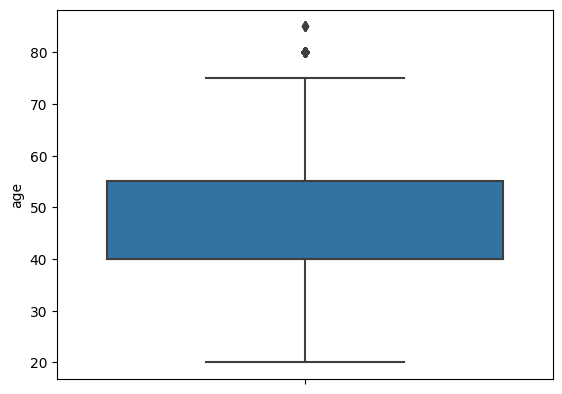

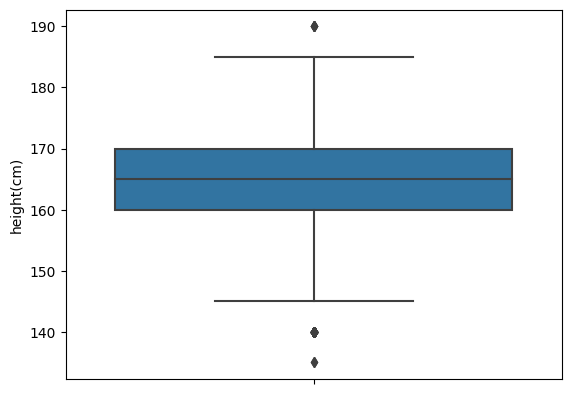

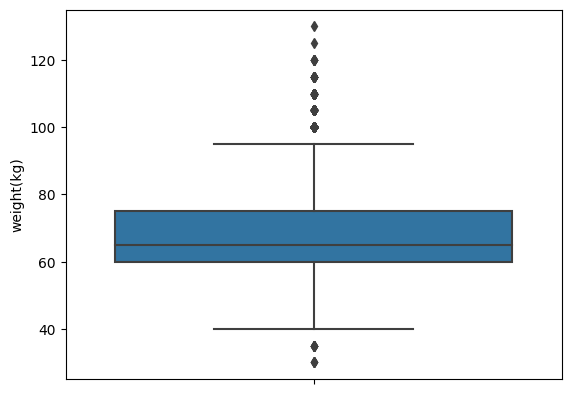

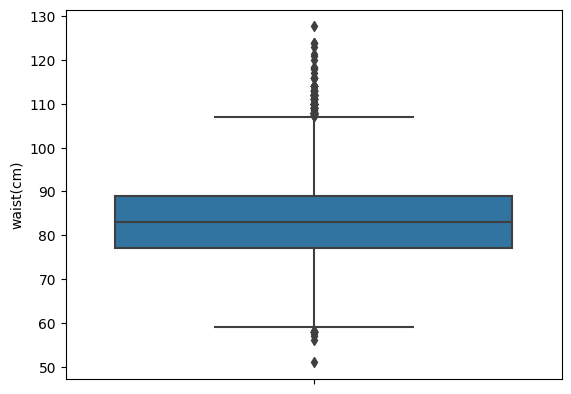

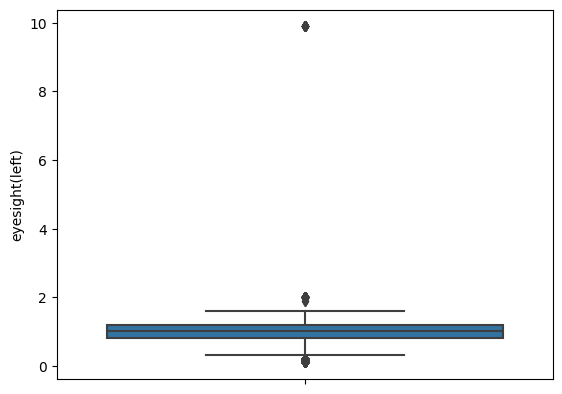

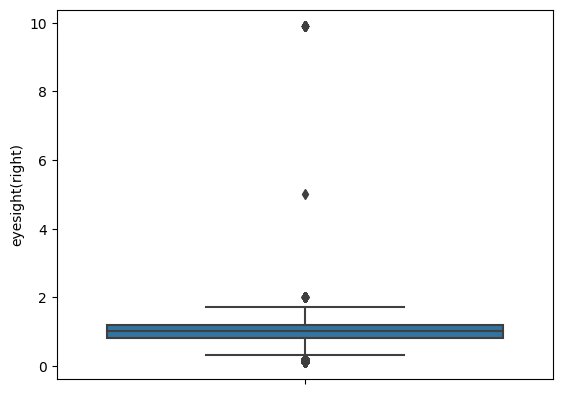

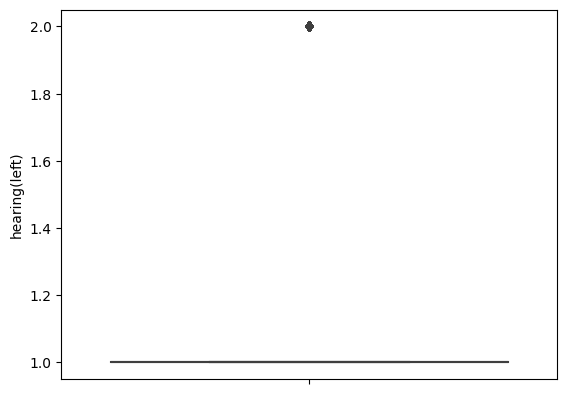

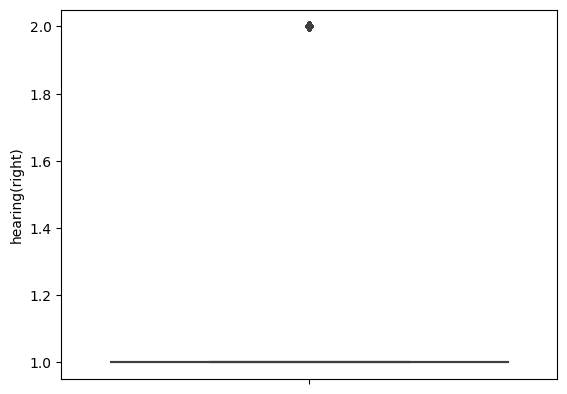

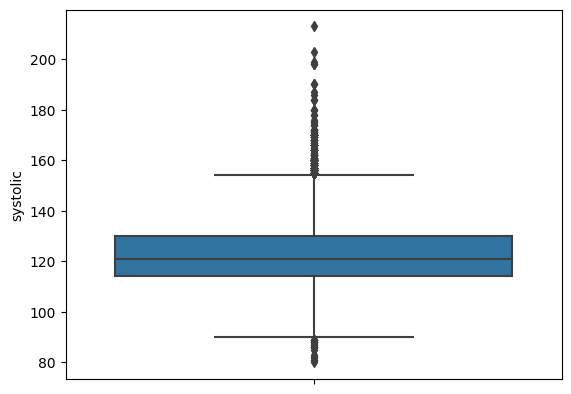

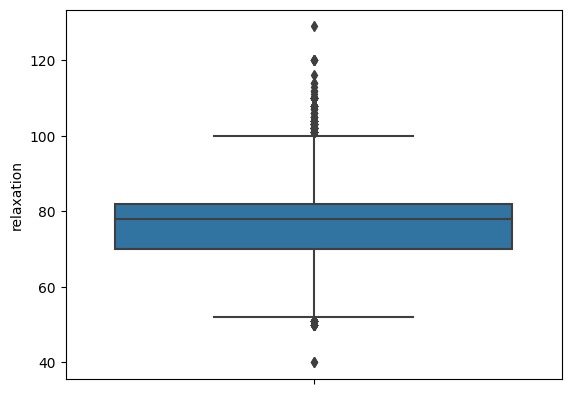

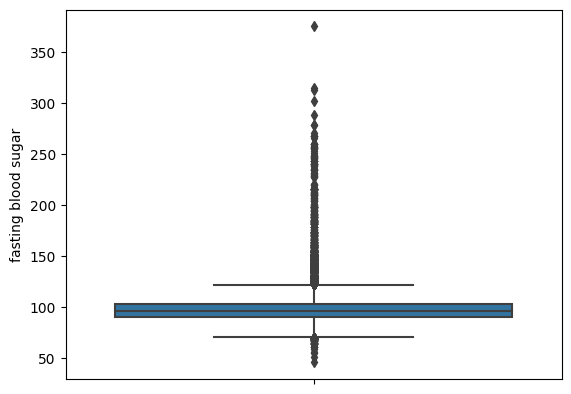

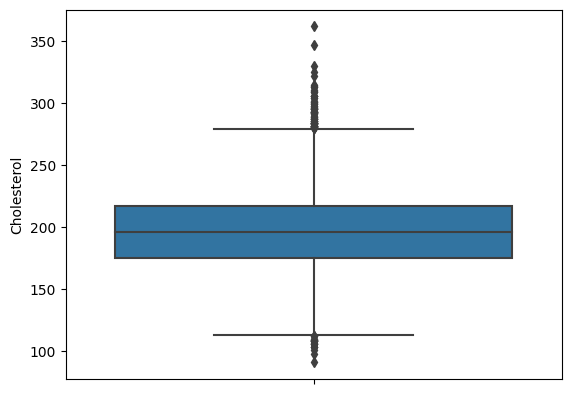

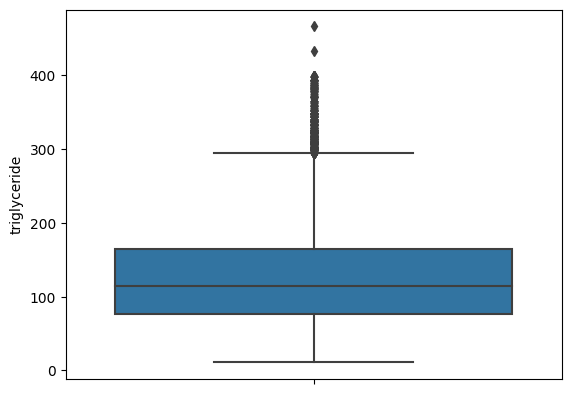

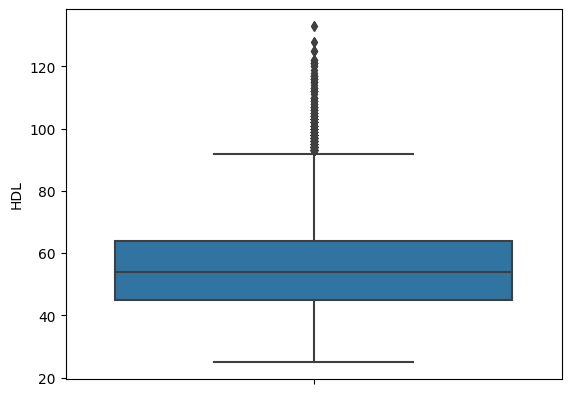

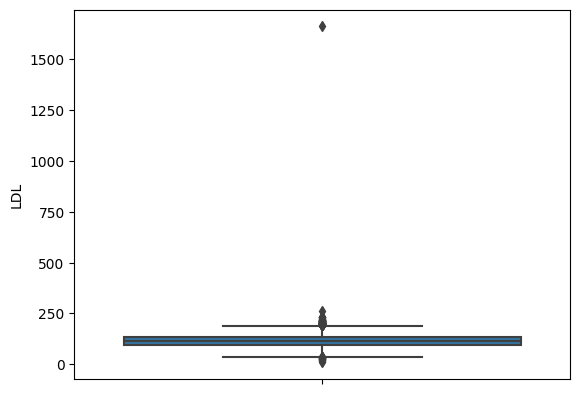

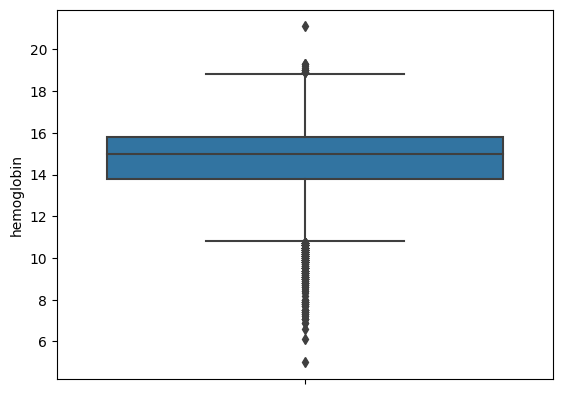

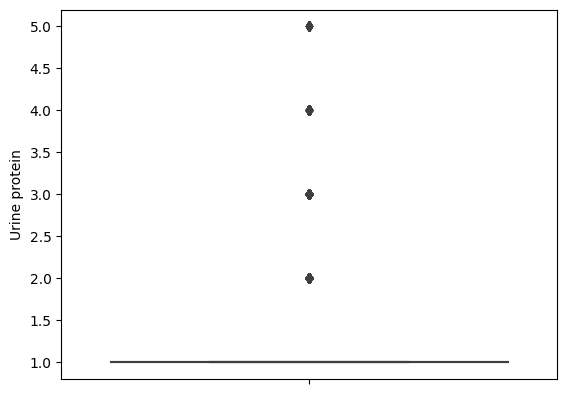

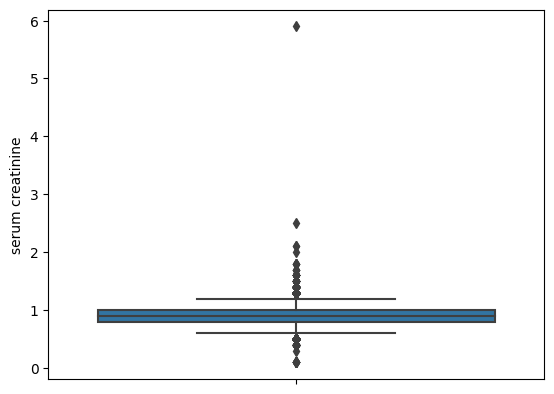

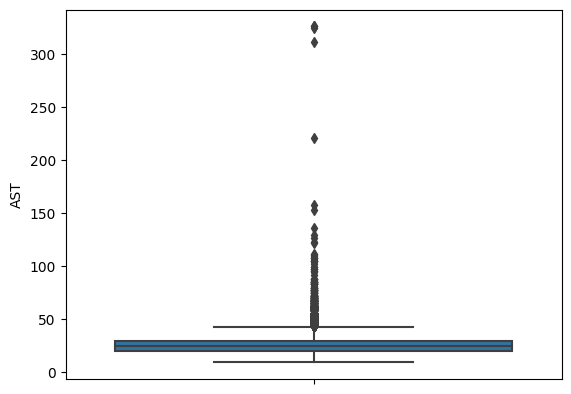

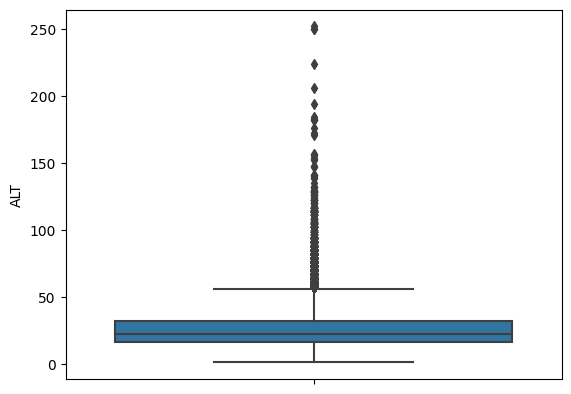

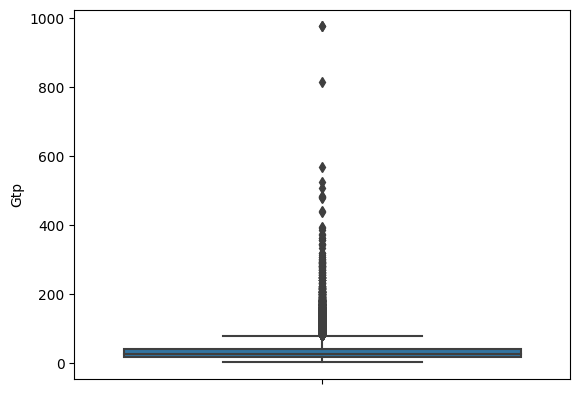

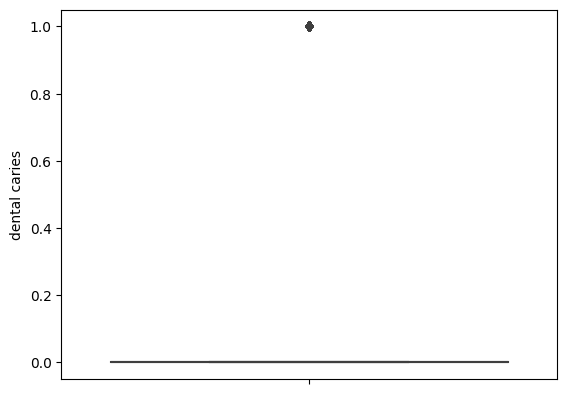

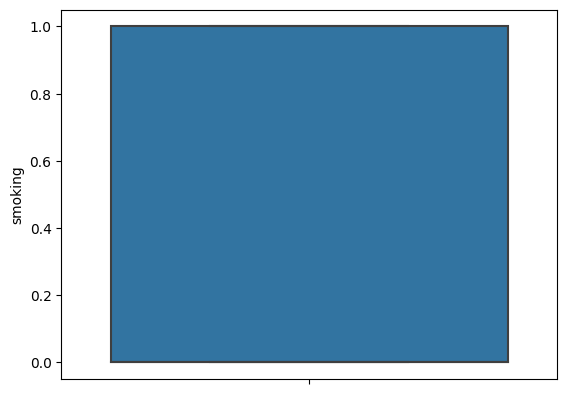

In [25]:
box_plot(null_df)

In [26]:
for i in df_numerics_only.columns:
  print('*********', i ,'***********')
  print(null_df[i].value_counts())

********* age ***********
40    11310
60     4658
45     4566
50     3962
55     3348
35     3193
30     2734
25     2127
20      958
65      914
70      565
75      445
80      176
85        4
Name: age, dtype: int64
********* height(cm) ***********
170    9288
165    7415
175    5898
160    5586
155    4746
150    2924
180    1929
145     680
185     375
140     110
190       5
135       2
181       1
174       1
Name: height(cm), dtype: int64
********* weight(kg) ***********
70     5906
65     5687
60     5263
75     4766
55     4519
50     3510
80     3320
85     2103
45     1358
90     1139
95      615
100     305
40      239
105     119
110      64
115      24
35        9
120       8
30        4
130       1
125       1
Name: weight(kg), dtype: int64
********* waist(cm) ***********
80.0     1550
82.0     1517
84.0     1488
86.0     1423
81.0     1387
         ... 
61.7        1
60.5        1
103.1       1
120.0       1
59.8        1
Name: waist(cm), Length: 476, dtype: int64
*****

In [27]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [28]:
Columns = ['hearing(left)', 'hearing(right)','Urine protein', 'dental carie', 'smoking']

In [29]:
sclaing_df = null_df[null_df.columns.difference(['hearing(left)', 'hearing(right)','Urine protein', 'dental caries','smoking','data'])]

In [30]:
sclaing_df.columns

Index(['ALT', 'AST', 'Cholesterol', 'Gtp', 'HDL', 'LDL', 'age',
       'eyesight(left)', 'eyesight(right)', 'fasting blood sugar',
       'height(cm)', 'hemoglobin', 'relaxation', 'serum creatinine',
       'systolic', 'triglyceride', 'waist(cm)', 'weight(kg)'],
      dtype='object')

In [31]:
scale_df = null_df.copy()

In [32]:
for i in sclaing_df.columns:
  scale_df[i] = scaler.fit_transform(scale_df[[i]])

In [33]:
scale_df.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0  0.888169   -0.018488   -0.556469  -0.214059       -1.236451   
1  2.153071   -0.018488   -0.159624   0.676798       -0.991218   
2 -2.063268    0.549121    0.634065  -0.214059       -1.481684   
3 -0.798367    1.684339    2.221444   2.458512        1.215880   
4 -1.220001   -0.018488   -0.556469  -0.269738        1.215880   

   eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  ...  \
0        -1.003433              1               1  0.980536    1.123173  ...   
1        -0.751856              2               2  1.839393    0.681666  ...   
2        -1.255009              1               1 -0.346790   -0.201347  ...   
3         0.506027              1               1  0.668224    1.233550  ...   
4         0.002873              1               1 -0.112556   -0.090970  ...   

        LDL  hemoglobin  Urine protein  serum creatinine       AST       ALT  \
0 -1.463819    1.202605            1.0          0.601055 -0.386247 -0.091776   
1  0.419526    0.991610            1.0          1.163452  0.162965 -0.224152   
2 -0.799109    1.835592            1.0         -0.523739  0.162965  0.305352   
3 -0.466754    0.780614            1.0          0.601055 -0.605932  0.040600   
4 -0.799109    0.428955            1.0         -0.523739 -0.715774 -0.886032   

        Gtp  dental caries  smoking   data  
0 -0.295687            0.0      1.0  train  
1  0.039933            1.0      0.0  train  
2  0.576926            0.0      1.0  train  
3 -0.195001            1.0      0.0  train  
4 -0.631307            0.0      1.0  train  

[5 rows x 24 columns]

In [34]:
#Encoding
dummies = pd.get_dummies(scale_df[['hearing(left)', 'hearing(right)','Urine protein', 'dental caries']],
                        columns = ['hearing(left)', 'hearing(right)','Urine protein', 'dental caries'],
                        prefix = ['hearing(left)', 'hearing(right)','Urine protein', 'dental caries'],
                        drop_first=True)

In [35]:
dummies.head()

hearing(left)_2  hearing(right)_2  Urine protein_2.0  Urine protein_3.0  \
0                0                 0                  0                  0   
1                1                 1                  0                  0   
2                0                 0                  0                  0   
3                0                 0                  0                  0   
4                0                 0                  0                  0   

   Urine protein_4.0  Urine protein_5.0  dental caries_1.0  
0                  0                  0                  0  
1                  0                  0                  1  
2                  0                  0                  0  
3                  0                  0                  1  
4                  0                  0                  0

In [36]:
encode_df = scale_df.copy()

In [37]:
encode_df = encode_df.drop(['hearing(left)', 'hearing(right)','Urine protein', 'dental caries'], axis=1)

In [38]:
encode_df.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0  0.888169   -0.018488   -0.556469  -0.214059       -1.236451   
1  2.153071   -0.018488   -0.159624   0.676798       -0.991218   
2 -2.063268    0.549121    0.634065  -0.214059       -1.481684   
3 -0.798367    1.684339    2.221444   2.458512        1.215880   
4 -1.220001   -0.018488   -0.556469  -0.269738        1.215880   

   eyesight(right)  systolic  relaxation  fasting blood sugar  Cholesterol  \
0        -1.003433  0.980536    1.123173            -0.281244    -0.843898   
1        -0.751856  1.839393    0.681666             3.202368    -0.067245   
2        -1.255009 -0.346790   -0.201347            -1.267172    -0.632083   
3         0.506027  0.668224    1.233550            -0.478430    -0.561479   
4         0.002873 -0.112556   -0.090970            -0.478430    -1.444039   

   triglyceride       HDL       LDL  hemoglobin  serum creatinine       AST  \
0      2.593308 -1.135292 -1.463819    1.202605          0.601055 -0.386247   
1     -1.087809  0.078417  0.419526    0.991610          1.163452  0.162965   
2      1.045736 -0.778319 -0.799109    1.835592         -0.523739  0.162965   
3      1.135886 -1.278081 -0.466754    0.780614          0.601055 -0.605932   
4     -0.607010 -0.849714 -0.799109    0.428955         -0.523739 -0.715774   

        ALT       Gtp  smoking   data  
0 -0.091776 -0.295687      1.0  train  
1 -0.224152  0.039933      0.0  train  
2  0.305352  0.576926      1.0  train  
3  0.040600 -0.195001      0.0  train  
4 -0.886032 -0.631307      1.0  train

In [39]:
Final_df = pd.concat([encode_df, dummies], axis=1)

In [40]:
Final_df.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0  0.888169   -0.018488   -0.556469  -0.214059       -1.236451   
1  2.153071   -0.018488   -0.159624   0.676798       -0.991218   
2 -2.063268    0.549121    0.634065  -0.214059       -1.481684   
3 -0.798367    1.684339    2.221444   2.458512        1.215880   
4 -1.220001   -0.018488   -0.556469  -0.269738        1.215880   

   eyesight(right)  systolic  relaxation  fasting blood sugar  Cholesterol  \
0        -1.003433  0.980536    1.123173            -0.281244    -0.843898   
1        -0.751856  1.839393    0.681666             3.202368    -0.067245   
2        -1.255009 -0.346790   -0.201347            -1.267172    -0.632083   
3         0.506027  0.668224    1.233550            -0.478430    -0.561479   
4         0.002873 -0.112556   -0.090970            -0.478430    -1.444039   

   ...       Gtp  smoking   data  hearing(left)_2  hearing(right)_2  \
0  ... -0.295687      1.0  train                0                 0   
1  ...  0.039933      0.0  train                1                 1   
2  ...  0.576926      1.0  train                0                 0   
3  ... -0.195001      0.0  train                0                 0   
4  ... -0.631307      1.0  train                0                 0   

   Urine protein_2.0  Urine protein_3.0  Urine protein_4.0  Urine protein_5.0  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

  dental caries_1.0  
0                 0  
1                 1  
2                 0  
3                 1  
4                 0  

[5 rows x 27 columns]

In [41]:
Final_df['smoking'].value_counts()

0.0    33211
1.0     5749
Name: smoking, dtype: int64

In [42]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [43]:
corr_features = correlation(Final_df, 0.7)
len(set(corr_features))

<ipython-input-42-104b3ebdd19c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


3

In [44]:
corr_features

{'LDL', 'relaxation', 'waist(cm)'}

In [45]:
Final_df.shape

(38960, 27)

In [46]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<ipython-input-47-6c81fa8819ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Final_df.corr(), annot=True, cmap='coolwarm')


<Axes: >

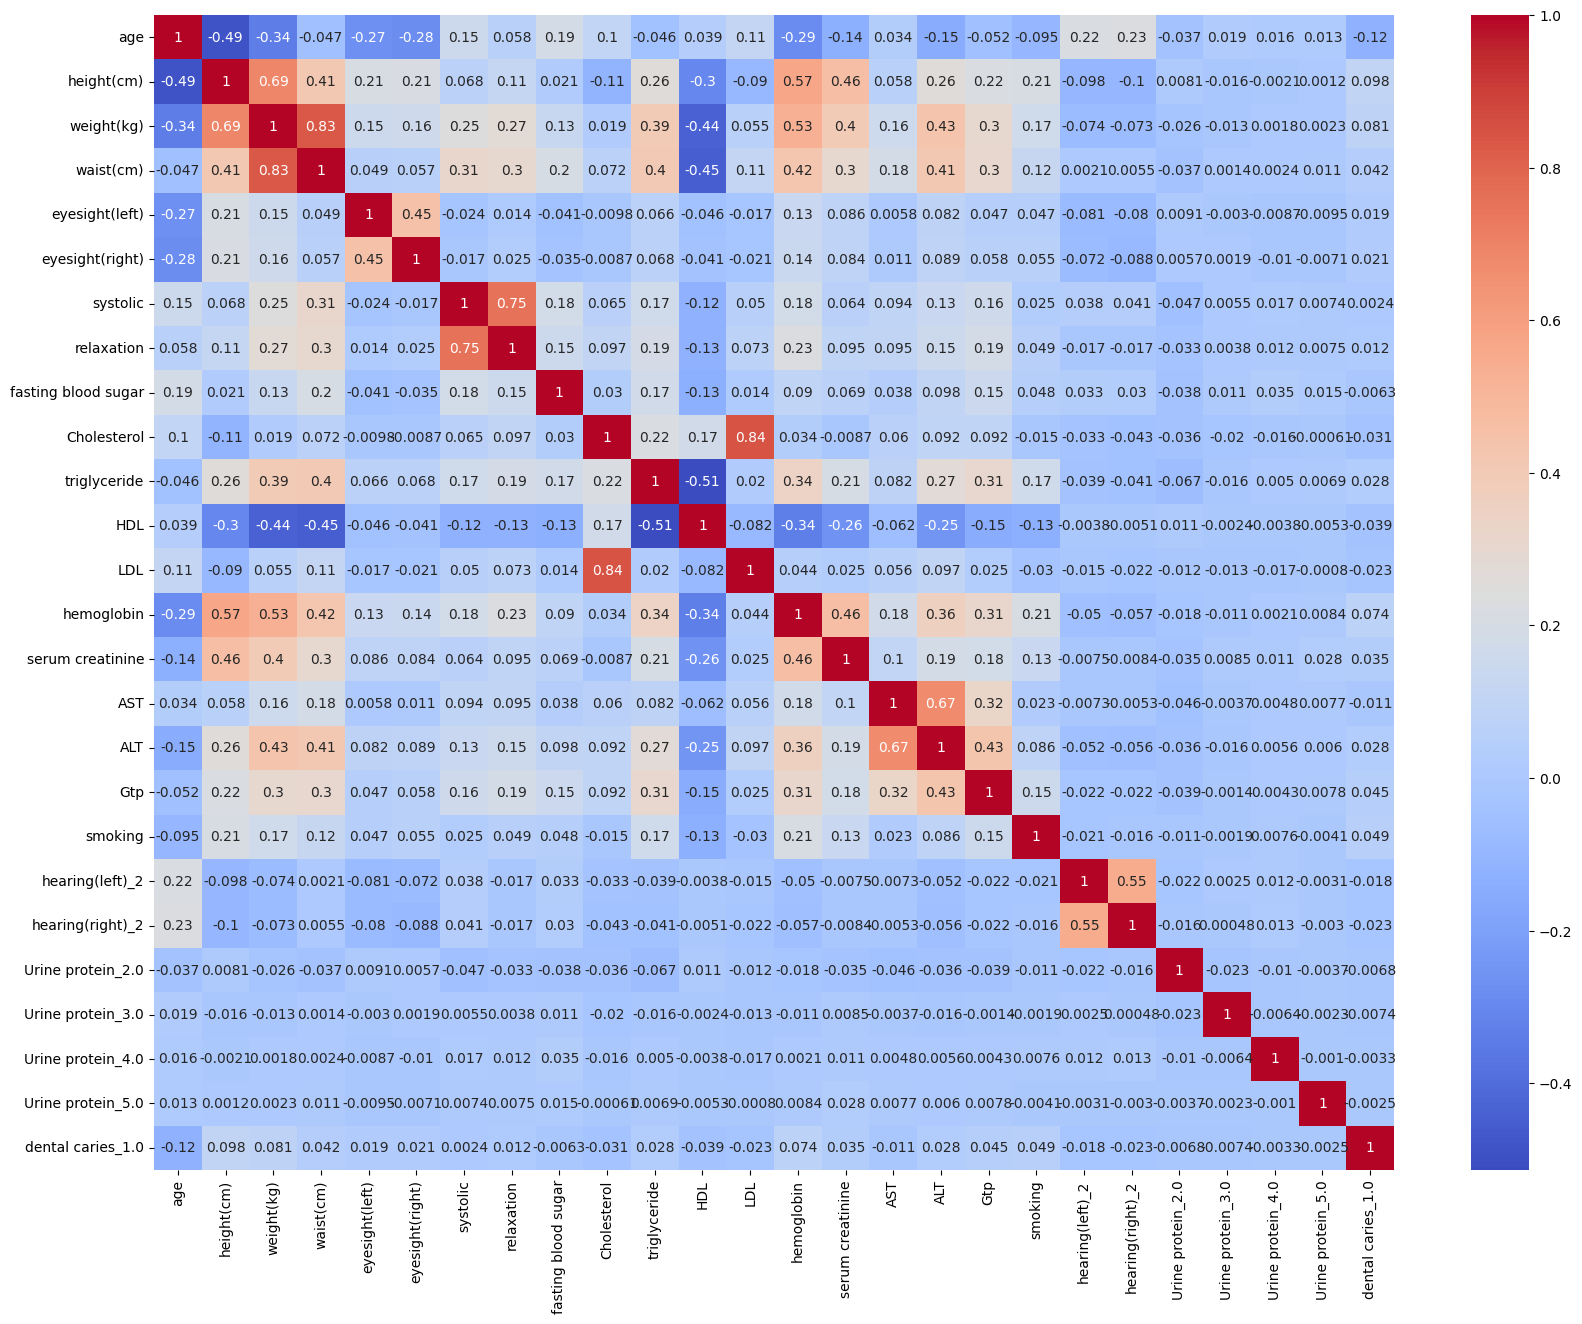

In [47]:
plt.figure(figsize=(20,15))
sns.heatmap(Final_df.corr(), annot=True, cmap='coolwarm')

In [48]:
Final_df1 = Final_df.drop(['LDL', 'relaxation', 'waist(cm)'], axis=1)

In [49]:
Final_df1.shape

(38960, 24)

In [50]:
#separate training and test data
train = Final_df1[Final_df1['data']=='train']
test = Final_df1[Final_df1['data']=='test']

In [51]:
train = train.drop(['data'], axis=1)
test = test.drop(['data'], axis=1)

In [52]:
print(train.shape)
print(test.shape)

(12969, 23)
(25991, 23)


In [53]:
#split the data into independent and dependent variable
x = train.drop(['smoking'], axis=1)
y = train['smoking']
test = test.drop(['smoking'], axis=1)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=102, stratify=y)

In [55]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [56]:
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True)
]

In [57]:
def build_model(hp):
  model = Sequential()
  # assign hyperparameter tuning - how many hidden layer
  counter = 0
  for i in range(hp.Int('no_hidden_layer', min_value=1, max_value=10)):
    if counter == 0:
      model.add(Dense(hp.Int('no_neurons' + str(i), min_value=8, max_value=128, step=8),
                      activation=hp.Choice('activation_func' + str(i),
                                           values = ['relu','leaky_relu']), input_dim=x_train.shape[1]))
      model.add(Dropout(hp.Choice("Dropout" + str(i),
                                  values=[0.1,0.2,0.3,0.4,0.5])))
    else:
      model.add(Dense(hp.Int('no_neurons' + str(i), min_value=8, max_value=128, step=8),
                      activation=hp.Choice('activation_func' + str(i),
                                           values = ['relu','leaky_relu'])))
      model.add(Dropout(hp.Choice("Dropout" + str(i),
                                  values=[0.1,0.2,0.3,0.4,0.5])))
    counter +=1
  model.add(Dense(1, activation='sigmoid')) # output layer - fix
  model.compile(optimizer= hp.Choice("Optimizer",
                                     values=['adam','rmsprop','sgd']),
                loss='binary_crossentropy', metrics=['accuracy'] )
  return model

In [58]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.4 MB/s eta 0:00:00


In [59]:
from kerastuner.tuners import RandomSearch
import kerastuner as kt

<ipython-input-59-9c3f090bbf7f>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [60]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5,
                        directory='my_own_directory', project_name='HyperParam')

In [61]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 22s]
val_accuracy: 0.570932924747467

Best val_accuracy So Far: 0.7779490947723389
Total elapsed time: 00h 01m 19s


In [62]:
tuner.get_best_hyperparameters()[0].values

{'no_hidden_layer': 2,
 'no_neurons0': 112,
 'activation_func0': 'relu',
 'Dropout0': 0.3,
 'Optimizer': 'rmsprop',
 'no_neurons1': 56,
 'activation_func1': 'leaky_relu',
 'Dropout1': 0.3,
 'no_neurons2': 16,
 'activation_func2': 'leaky_relu',
 'Dropout2': 0.1,
 'no_neurons3': 112,
 'activation_func3': 'leaky_relu',
 'Dropout3': 0.4,
 'no_neurons4': 32,
 'activation_func4': 'leaky_relu',
 'Dropout4': 0.2,
 'no_neurons5': 104,
 'activation_func5': 'relu',
 'Dropout5': 0.5,
 'no_neurons6': 56,
 'activation_func6': 'relu',
 'Dropout6': 0.3,
 'no_neurons7': 120,
 'activation_func7': 'relu',
 'Dropout7': 0.3,
 'no_neurons8': 32,
 'activation_func8': 'relu',
 'Dropout8': 0.4}

In [63]:
model1 = Sequential()
model1.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_dim=x_train.shape[1]))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())
model1.add(Dense(104, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model1.add(Dropout(0.1))
model1.add(BatchNormalization())
# model1.add(Dense(48, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# model1.add(Dropout(0.4))
# model1.add(BatchNormalization())
# model1.add(Dense(88, activation='leaky_relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# model1.add(Dropout(0.5))
# model1.add(BatchNormalization())
# model1.add(Dense(64, activation='leaky_relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# model1.add(Dropout(0.2))
# model1.add(BatchNormalization())
# model1.add(Dense(48, activation='leaky_relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# model1.add(Dropout(0.4))
# model1.add(BatchNormalization())
# model1.add(Dense(120, activation='leaky_relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# model1.add(Dropout(0.2))
# model1.add(BatchNormalization())
# model1.add(Dense(24, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# model1.add(Dropout(0.4))
# model1.add(BatchNormalization())
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 256)               5888      
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_12 (Dense)            (None, 104)               26728     
                                                                 
 dropout_11 (Dropout)        (None, 104)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 104)               416       
 chNormalization)                                     

In [64]:
history = model1.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=callbacks_list,epochs=300)

Epoch 1/300
325/325 [==============================] - 5s 7ms/step - loss: 1.5664 - accuracy: 0.7157 - val_loss: 1.0539 - val_accuracy: 0.7502
Epoch 2/300
325/325 [==============================] - 3s 10ms/step - loss: 0.8831 - accuracy: 0.7384 - val_loss: 0.7149 - val_accuracy: 0.7471
Epoch 3/300
325/325 [==============================] - 3s 9ms/step - loss: 0.6654 - accuracy: 0.7484 - val_loss: 0.5880 - val_accuracy: 0.7583
Epoch 4/300
325/325 [==============================] - 3s 9ms/step - loss: 0.5767 - accuracy: 0.7544 - val_loss: 0.5447 - val_accuracy: 0.7621
Epoch 5/300
325/325 [==============================] - 3s 10ms/step - loss: 0.5463 - accuracy: 0.7563 - val_loss: 0.5125 - val_accuracy: 0.7683
Epoch 6/300
325/325 [==============================] - 4s 12ms/step - loss: 0.5288 - accuracy: 0.7597 - val_loss: 0.5194 - val_accuracy: 0.7645
Epoch 7/300
325/325 [==============================] - 3s 10ms/step - loss: 0.5232 - accuracy: 0.7565 - val_loss: 0.4980 - val_accuracy: 0.

In [70]:
from mlxtend.plotting import plot_decision_regions

In [84]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25803 entries, 0 to 25802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  25803 non-null  float64
 1   height(cm)           25803 non-null  float64
 2   weight(kg)           25803 non-null  float64
 3   eyesight(left)       25803 non-null  float64
 4   eyesight(right)      25803 non-null  float64
 5   systolic             25803 non-null  float64
 6   fasting blood sugar  25803 non-null  float64
 7   Cholesterol          25803 non-null  float64
 8   triglyceride         25803 non-null  float64
 9   HDL                  25803 non-null  float64
 10  hemoglobin           25803 non-null  float64
 11  serum creatinine     25803 non-null  float64
 12  AST                  25803 non-null  float64
 13  ALT                  25803 non-null  float64
 14  Gtp                  25803 non-null  float64
 15  hearing(left)_2.0    25803 non-null 

In [96]:
test.head()

age  height(cm)  weight(kg)  eyesight(left)  eyesight(right)  \
25803 -0.377239   -0.020013    0.232806        0.480638         0.517659   
25804  2.993804   -0.586113   -0.559882       -0.008774         0.006387   
25805  1.308282    0.546088    0.232806       -0.987598        -0.760521   
25806 -0.377239   -0.586113   -1.352570       -1.721716        -1.527430   
25807 -0.377239    0.546088    0.629151       -0.008774        -0.249249   

       systolic  fasting blood sugar  Cholesterol  triglyceride       HDL  \
25803  0.588335             0.570122     0.145311      0.882074 -0.490412   
25804  1.683144            -0.348210    -0.841670      0.460083 -1.491917   
25805 -0.428274            -0.413805    -1.229412      0.686150 -1.205773   
25806 -0.506474            -0.479400     0.603553     -1.212809  1.369527   
25807  0.744736            -1.266542    -0.912169     -0.414040 -1.205773   

       ...       ALT       Gtp  hearing(left)_2.0  hearing(right)_2.0  \
25803  ... -0.074903 -0.128434                  0                   0   
25804  ... -0.732168 -0.397924                  1                   1   
25805  ...  1.694656  0.006311                  0                   0   
25806  ... -0.428815 -0.869531                  0                   0   
25807  ...  0.632921 -0.296865                  0                   0   

       Urine protein_2.0  Urine protein_3.0  Urine protein_4.0  \
25803                  0                  0                  0   
25804                  0                  0                  0   
25805                  0                  0                  0   
25806                  0                  0                  0   
25807                  0                  0                  0   

       Urine protein_5.0  Urine protein_6.0  dental caries_1.0  
25803                  0                  0                  0  
25804                  0                  0                  0  
25805                  0                  0                  0  
25806                  0                  0                  1  
25807                  0                  0                  1  

[5 rows x 23 columns]

In [79]:
probabilities_pred = model1.predict(test)
tf.keras.utils.plot_model(model1, show_shapes=True)

NameError: ignored

In [103]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 98.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.9 MB/s

In [53]:
from pycaret.classification import *

In [55]:
exp_clf = setup(data=train, target='smoking', session_id=123)

In [56]:
compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [58]:
lightgbm = create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [59]:
# Hyperparameter tunning
tuned_lightgbm = tune_model(lightgbm)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


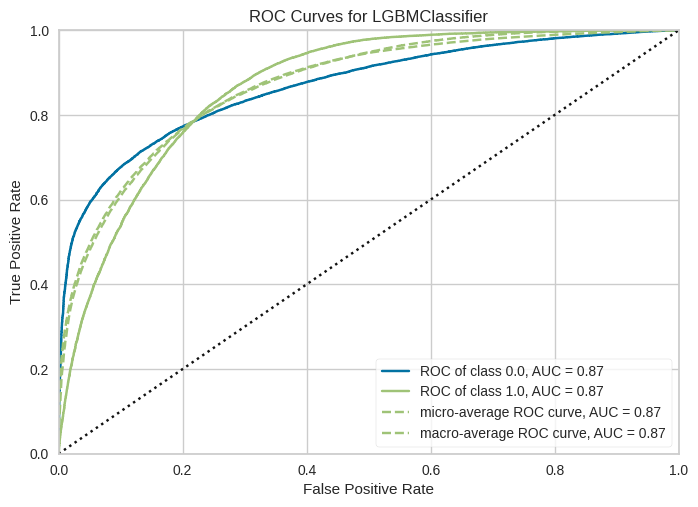

In [60]:
# plot the model
plot_model(tuned_lightgbm, plot='auc')

In [66]:
X_test = test.copy()

In [67]:
X_test.head()

age  height(cm)  weight(kg)  eyesight(left)  eyesight(right)  \
12969 -0.376733   -0.018488    0.237221        0.480181         0.506027   
12970  2.996339   -0.586097   -0.556469       -0.010285         0.002873   
12971  1.309803    0.549121    0.237221       -0.991218        -0.751856   
12972 -0.376733   -0.586097   -1.350158       -1.726917        -1.506586   
12973 -0.376733    0.549121    0.634065       -0.010285        -0.248703   

       systolic  fasting blood sugar  Cholesterol  triglyceride       HDL  \
12969  0.590146             0.573227     0.144570      0.880461 -0.492740   
12970  1.683238            -0.346973    -0.843898      0.459762 -1.492265   
12971 -0.424868            -0.412701    -1.232224      0.685137 -1.206687   
12972 -0.502946            -0.478430     0.603501     -1.208009  1.363520   
12973  0.746302            -1.267172    -0.914503     -0.411686 -1.206687   

       ...       AST       ALT       Gtp  hearing(left)_2  hearing(right)_2  \
12969  ... -0.715774 -0.091776 -0.127877                0                 0   
12970  ... -0.605932 -0.952220 -0.396373                1                 1   
12971  ...  1.371230  2.224803  0.006371                0                 0   
12972  ... -0.056720 -0.555092 -0.866241                0                 0   
12973  ...  0.492492  0.834855 -0.295687                0                 0   

       Urine protein_2.0  Urine protein_3.0  Urine protein_4.0  \
12969                  0                  0                  0   
12970                  0                  0                  0   
12971                  0                  0                  0   
12972                  0                  0                  0   
12973                  0                  0                  0   

       Urine protein_5.0  dental caries_1.0  
12969                  0                  0  
12970                  0                  0  
12971                  0                  0  
12972                  0                  1  
12973                  0                  1  

[5 rows x 22 columns]

In [71]:
X_test= X_test.drop('id', axis=1)

In [70]:
X_test.head()

age  height(cm)  weight(kg)  eyesight(left)  eyesight(right)  \
159256 -0.367031   -0.028176    0.227514        0.486103         0.512234   
159257  3.004411   -0.594671   -0.567001       -0.013462        -0.000992   
159258  1.318690    0.538319    0.227514       -1.012592        -0.770830   
159259 -0.367031   -0.594671   -1.361515       -1.761939        -1.540668   
159260 -0.367031    0.538319    0.624771       -0.013462        -0.257605   

        systolic  fasting blood sugar  Cholesterol  triglyceride       HDL  \
159256  0.589123             0.562793     0.146857      0.882477 -0.492215   
159257  1.687698            -0.350272    -0.838633      0.459863 -1.493738   
159258 -0.430983            -0.415491    -1.225789      0.686264 -1.207589   
159259 -0.509453            -0.480710     0.604406     -1.215501  1.367757   
159260  0.746062            -1.263337    -0.909025     -0.415552 -1.207589   

        ...       Gtp  hearing(left)_2  hearing(right)_2  Urine protein_2  \
159256  ... -0.133927                0                 0                0   
159257  ... -0.391209                1                 1                0   
159258  ... -0.005286                0                 0                0   
159259  ... -0.841452                0                 0                0   
159260  ... -0.294728                0                 0                0   

        Urine protein_3  Urine protein_4  Urine protein_5  Urine protein_6  \
159256                0                0                0                0   
159257                0                0                0                0   
159258                0                0                0                0   
159259                0                0                0                0   
159260                0                0                0                0   

        dental caries_1  id  
159256                0 NaN  
159257                0 NaN  
159258                0 NaN  
159259                1 NaN  
159260                1 NaN  

[5 rows x 24 columns]

In [62]:
y_pred = lightgbm.predict(X_test)

In [72]:
y_pred

array([1., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [73]:
submission = sample.copy()

In [74]:
submission = submission.drop('smoking', axis=1)

In [75]:
submission['smoking'] = y_pred

In [77]:
submission.to_csv("/content/submission_cigarette_cart_best.csv")

In [69]:
probabilities_pred = model1.predict(X_test)

813/813 [==============================] - 1s 2ms/step


In [70]:
submission1 = sample.copy()

In [71]:
submission1 = submission1.drop('smoking', axis=1)

In [72]:
submission1['smoking'] = probabilities_pred

ValueError: ignored

In [73]:
probabilities_pred

array([[0.65496904],
       [0.1857852 ],
       [0.4099178 ],
       ...,
       [0.53254   ],
       [0.01294898],
       [0.17866798]], dtype=float32)